# 使用迁移学习进行鲜花分类

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

## 1.数据导入

In [30]:
IMAGE_SIZE =(224,224)
BATCH_SIZE =32
BASE_DIR = "../../Tools/session3/dataset"

In [31]:
gen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.25,
                                                      preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

In [32]:
train_generator = gen.flow_from_directory(BASE_DIR,
                                          IMAGE_SIZE,
                                          batch_size=BATCH_SIZE,
                                          subset="training"
                                         )

Found 2757 images belonging to 5 classes.


In [33]:
train_generator.next()[0].shape

(32, 224, 224, 3)

In [34]:
validation_generator = gen.flow_from_directory(BASE_DIR,
                                          IMAGE_SIZE,
                                          batch_size=BATCH_SIZE,
                                          subset="validation"
                                         )

Found 917 images belonging to 5 classes.


## 2.保存标签

In [35]:
labels = '\n'.join(sorted(train_generator.class_indices.keys()))

In [36]:
with open('model/labels.txt','w') as f:
    f.write(labels)

## 3.模型搭建

In [37]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                              include_top=False,
                                              weights="imagenet")

In [38]:
for layer in base_model.layers:
    layer.trainable = False

In [39]:
model_new =tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(5,activation="softmax")
])

In [40]:
model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                81984     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 2,340,293
Trainable params: 82,309
Non-trainable params: 2,257,984
_________________________________________________________________


In [41]:
model_new.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [42]:
training_steps=np.ceil(train_generator.samples/BATCH_SIZE - 1)
validation_steps = np.ceil(validation_generator.samples/BATCH_SIZE - 1)

In [43]:
history = model_new.fit(train_generator,
          epochs=10,
          steps_per_epoch=training_steps,
          validation_data=validation_generator,
          validation_steps=validation_steps)

Train for 86.0 steps, validate for 28.0 steps
Epoch 1/10
86/86 [==============================] - 22s 259ms/step - loss: 0.7128 - accuracy: 0.7383 - val_loss: 0.6729 - val_accuracy: 0.7344
Epoch 2/10
86/86 [==============================] - 19s 216ms/step - loss: 0.3181 - accuracy: 0.8892 - val_loss: 0.7110 - val_accuracy: 0.7522
Epoch 3/10
86/86 [==============================] - 19s 218ms/step - loss: 0.2322 - accuracy: 0.9189 - val_loss: 0.8331 - val_accuracy: 0.7400
Epoch 4/10
86/86 [==============================] - 19s 217ms/step - loss: 0.1649 - accuracy: 0.9439 - val_loss: 0.7204 - val_accuracy: 0.7779
Epoch 5/10
86/86 [==============================] - 18s 215ms/step - loss: 0.1199 - accuracy: 0.9662 - val_loss: 0.6953 - val_accuracy: 0.7902
Epoch 6/10
86/86 [==============================] - 18s 212ms/step - loss: 0.0886 - accuracy: 0.9835 - val_loss: 0.7802 - val_accuracy: 0.7846
Epoch 7/10
86/86 [==============================] - 19s 217ms/step - loss: 0.0627 - accuracy: 0.

## 4.模型的评估

In [44]:
import numpy as np
def plot_model_history(model_history):
    '''
    功能：根据history对象，绘制训练集和验证集上loss和accuracy的变化图
    参数：history对象
    来源：https://www.tensorflow.org/tutorials/keras/basic_classification?hl=zh-cn 
    '''
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


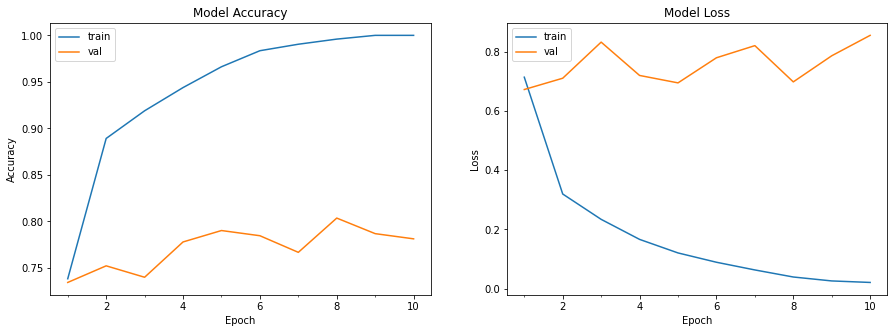

In [45]:
plot_model_history(history)

## 5.模型的使用

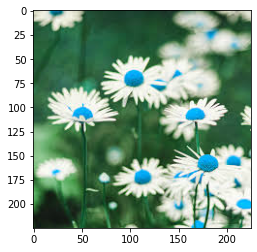

In [47]:
img = cv2.imread("test/daisy.jpeg")

plt.imshow(img)

plt.show()

In [48]:
# 将图片缩放到224，224
test_img=cv2.resize(img,(224,224))
# 将图片转化为浮点数
test_img = tf.keras.preprocessing.image.img_to_array(test_img)
# 将图片扩维
test_img = np.expand_dims(test_img,axis=0)
# 将图片带入预处理
test_img = tf.keras.applications.mobilenet_v2.preprocess_input(test_img)

In [49]:
prediction = model_new.predict(test_img)

In [51]:
prediction

array([[9.9743479e-01, 1.7964552e-05, 9.7676089e-09, 2.5451276e-03,
        2.1271501e-06]], dtype=float32)

In [52]:
max_prediction = np.argmax(prediction)
max_prediction

0

In [53]:
label_dic = train_generator.class_indices
label_dic

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [54]:
[k for k,v in label_dic.items() if v==max_prediction]

['daisy']

## 6.模型微调（Fine tuning）

In [55]:
base_model.trainable = True

In [56]:
len(base_model.layers)

155

In [57]:
fine_tune_at = 100

In [58]:
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [59]:
model_new.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [66]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5)

In [67]:
history_fine = model_new.fit(train_generator,
          epochs=50,
          steps_per_epoch=training_steps,
          validation_data=validation_generator,
          validation_steps=validation_steps,
          callbacks=[early_stopping])

Train for 86.0 steps, validate for 28.0 steps
Epoch 1/50
86/86 [==============================] - 20s 232ms/step - loss: 0.0597 - accuracy: 0.9831 - val_loss: 15.0691 - val_accuracy: 0.4743
Epoch 2/50
86/86 [==============================] - 20s 237ms/step - loss: 0.1405 - accuracy: 0.9618 - val_loss: 11.1741 - val_accuracy: 0.4554
Epoch 3/50
86/86 [==============================] - 20s 235ms/step - loss: 0.0987 - accuracy: 0.9739 - val_loss: 7.4166 - val_accuracy: 0.5223
Epoch 4/50
86/86 [==============================] - 20s 238ms/step - loss: 0.0649 - accuracy: 0.9794 - val_loss: 6.6497 - val_accuracy: 0.5826
Epoch 5/50
86/86 [==============================] - 20s 235ms/step - loss: 0.1002 - accuracy: 0.9688 - val_loss: 4.4550 - val_accuracy: 0.6752
Epoch 6/50
86/86 [==============================] - 21s 242ms/step - loss: 0.0552 - accuracy: 0.9791 - val_loss: 5.9346 - val_accuracy: 0.6473
Epoch 7/50
86/86 [==============================] - 20s 233ms/step - loss: 0.0461 - accuracy: 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


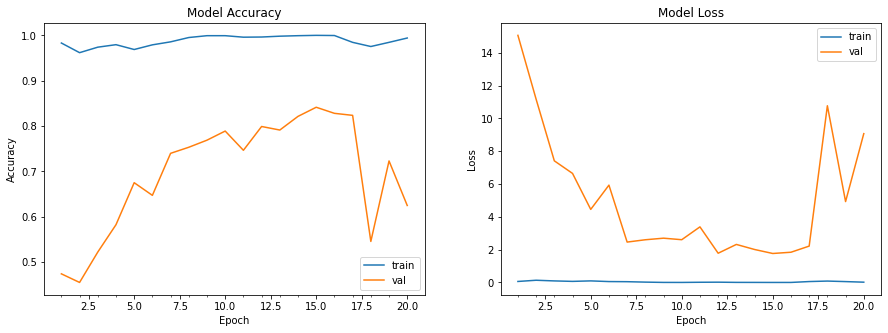

In [68]:
plot_model_history(history_fine)

## 6.模型的保存

In [62]:
model_new.save("model/flowers_model_1015.h5")

In [63]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_new)
tflite_model = converter.convert()

In [64]:
with open('model_tflite/model_1015.tflite','wb') as f:
    f.write(tflite_model)